<a href="https://www.kaggle.com/code/loganhegler/defense-wins-championships-or-does-it?scriptVersionId=195746141" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Defense wins championships! Or does it?

Defense wins championships! If you've spent anytime around sports odds are that you've heard this phrase many times before. However, there are many factors that contribute to a teams success, such as scoring efficency, turnovers, and much more. In this notebook I will attempt to create a model that predicts whether a team will win a given NCAA tournament game or not based on key stats from previous winners and losers. This model will then be used to simulate a tournament and create bracket predictions for March Madness. 

First lets import any dependencies and set up our directory with the data sets from Kaggle:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/march-machine-learning-mania-2024/Conferences.csv
/kaggle/input/march-machine-learning-mania-2024/sample_submission.csv
/kaggle/input/march-machine-learning-mania-2024/WNCAATourneyDetailedResults.csv
/kaggle/input/march-machine-learning-mania-2024/WRegularSeasonCompactResults.csv
/kaggle/input/march-machine-learning-mania-2024/MNCAATourneySeedRoundSlots.csv
/kaggle/input/march-machine-learning-mania-2024/MRegularSeasonDetailedResults.csv
/kaggle/input/march-machine-learning-mania-2024/MNCAATourneyCompactResults.csv
/kaggle/input/march-machine-learning-mania-2024/MGameCities.csv
/kaggle/input/march-machine-learning-mania-2024/WGameCities.csv
/kaggle/input/march-machine-learning-mania-2024/MSeasons.csv
/kaggle/input/march-machine-learning-mania-2024/WNCAATourneySlots.csv
/kaggle/input/march-machine-learning-mania-2024/MSecondaryTourneyTeams.csv
/kaggle/input/march-machine-learning-mania-2024/2024_tourney_seeds.csv
/kaggle/input/march-machine-learning-mania-2024/Cities.csv
/

### Preparing our data:

In order to create our training and validation sets we will be using a data set provided by Kaggle that contains the box scores of every NCAA tournament game dating back to the 2003 season for mens and the 2010 season for womens. 

In [2]:
MNCAATourneyDetailed= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MNCAATourneyDetailedResults.csv')
WNCAATourneyDetailed= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WNCAATourneyDetailedResults.csv')

We'll use the original data set to construct data frames consisting of a teams stats as well as a new conditional category denoting whether a team won or lost. We will use this win or loss category as the dependent or prediction variable for our model. We will also omit any team names or team ID's from the data set in order to prevent overfitting. 

In [3]:
#Mens data
MasterTrainDf= pd.DataFrame()
trainDfIndex=0
for i in range(len(MNCAATourneyDetailed)):
    MasterTrainDf.loc[trainDfIndex, 'Score']= MNCAATourneyDetailed.loc[i, 'WScore']
    MasterTrainDf.loc[trainDfIndex, 'FG%']= MNCAATourneyDetailed.loc[i, 'WFGM']/MNCAATourneyDetailed.loc[i, 'WFGA']
    MasterTrainDf.loc[trainDfIndex, '3pt%']= MNCAATourneyDetailed.loc[i, 'WFGM3']/MNCAATourneyDetailed.loc[i, 'WFGA3']
    MasterTrainDf.loc[trainDfIndex, 'FT%']= MNCAATourneyDetailed.loc[i, 'WFTM']/MNCAATourneyDetailed.loc[i, 'WFTA']
    MasterTrainDf.loc[trainDfIndex, 'OffReb']= MNCAATourneyDetailed.loc[i, 'WOR']
    MasterTrainDf.loc[trainDfIndex, 'DefReb']= MNCAATourneyDetailed.loc[i, 'WDR']
    MasterTrainDf.loc[trainDfIndex, 'Ast']= MNCAATourneyDetailed.loc[i, 'WAst']
    MasterTrainDf.loc[trainDfIndex, 'TO']= MNCAATourneyDetailed.loc[i, 'WTO']
    MasterTrainDf.loc[trainDfIndex, 'Stl']= MNCAATourneyDetailed.loc[i, 'WStl']
    MasterTrainDf.loc[trainDfIndex, 'Blk']= MNCAATourneyDetailed.loc[i, 'WBlk']
    MasterTrainDf.loc[trainDfIndex, 'PF']= MNCAATourneyDetailed.loc[i, 'WPF']
    MasterTrainDf.loc[trainDfIndex, 'W/L']= 1
    trainDfIndex=trainDfIndex+1
    MasterTrainDf.loc[trainDfIndex, 'Score']= MNCAATourneyDetailed.loc[i, 'LScore']
    MasterTrainDf.loc[trainDfIndex, 'FG%']= MNCAATourneyDetailed.loc[i, 'LFGM']/MNCAATourneyDetailed.loc[i, 'WFGA']
    MasterTrainDf.loc[trainDfIndex, '3pt%']= MNCAATourneyDetailed.loc[i, 'LFGM3']/MNCAATourneyDetailed.loc[i, 'WFGA3']
    MasterTrainDf.loc[trainDfIndex, 'FT%']= MNCAATourneyDetailed.loc[i, 'LFTM']/MNCAATourneyDetailed.loc[i, 'WFTA']
    MasterTrainDf.loc[trainDfIndex, 'OffReb']= MNCAATourneyDetailed.loc[i, 'LOR']
    MasterTrainDf.loc[trainDfIndex, 'DefReb']= MNCAATourneyDetailed.loc[i, 'LDR']
    MasterTrainDf.loc[trainDfIndex, 'Ast']= MNCAATourneyDetailed.loc[i, 'LAst']
    MasterTrainDf.loc[trainDfIndex, 'TO']= MNCAATourneyDetailed.loc[i, 'LTO']
    MasterTrainDf.loc[trainDfIndex, 'Stl']= MNCAATourneyDetailed.loc[i, 'LStl']
    MasterTrainDf.loc[trainDfIndex, 'Blk']= MNCAATourneyDetailed.loc[i, 'LBlk']
    MasterTrainDf.loc[trainDfIndex, 'PF']= MNCAATourneyDetailed.loc[i, 'LPF']
    MasterTrainDf.loc[trainDfIndex, 'W/L']= 0
    trainDfIndex=trainDfIndex+1

In [4]:
MasterTrainDf

,Score,FG%,3pt%,FT%,OffReb,DefReb,Ast,TO,Stl,Blk,PF,W/L
0,92.0,0.463768,0.379310,0.653846,14.0,30.0,17.0,12.0,5.0,3.0,22.0,1.0
1,84.0,0.420290,0.413793,0.538462,17.0,28.0,16.0,15.0,5.0,0.0,22.0,0.0
2,80.0,0.469697,0.304348,0.785714,11.0,36.0,22.0,16.0,10.0,7.0,8.0,1.0
3,51.0,0.303030,0.173913,0.500000,8.0,26.0,12.0,17.0,10.0,3.0,15.0,0.0
4,84.0,0.525424,0.428571,0.727273,10.0,27.0,18.0,9.0,7.0,4.0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2625,59.0,0.350877,0.269231,0.923077,12.0,17.0,10.0,9.0,8.0,1.0,12.0,0.0
2626,72.0,0.438596,0.500000,0.590909,12.0,23.0,8.0,8.0,3.0,2.0,17.0,1.0
2627,71.0,0.403509,0.500000,0.727273,7.0,24.0,6.0,9.0,6.0,2.0,17.0,0.0
2628,76.0,0.433962,0.352941,0.888889,10.0,30.0,13.0,13.0,8.0,6.0,15.0,1.0


In [5]:
#Womens data
WMasterTrainDf= pd.DataFrame()
trainDfIndex=0
for i in range(len(WNCAATourneyDetailed)):
    WMasterTrainDf.loc[trainDfIndex, 'Score']= WNCAATourneyDetailed.loc[i, 'WScore']
    WMasterTrainDf.loc[trainDfIndex, 'FG%']= WNCAATourneyDetailed.loc[i, 'WFGM']/WNCAATourneyDetailed.loc[i, 'WFGA']
    WMasterTrainDf.loc[trainDfIndex, '3pt%']= WNCAATourneyDetailed.loc[i, 'WFGM3']/WNCAATourneyDetailed.loc[i, 'WFGA3']
    WMasterTrainDf.loc[trainDfIndex, 'FT%']= WNCAATourneyDetailed.loc[i, 'WFTM']/WNCAATourneyDetailed.loc[i, 'WFTA']
    WMasterTrainDf.loc[trainDfIndex, 'OffReb']= WNCAATourneyDetailed.loc[i, 'WOR']
    WMasterTrainDf.loc[trainDfIndex, 'DefReb']= WNCAATourneyDetailed.loc[i, 'WDR']
    WMasterTrainDf.loc[trainDfIndex, 'Ast']= WNCAATourneyDetailed.loc[i, 'WAst']
    WMasterTrainDf.loc[trainDfIndex, 'TO']= WNCAATourneyDetailed.loc[i, 'WTO']
    WMasterTrainDf.loc[trainDfIndex, 'Stl']= WNCAATourneyDetailed.loc[i, 'WStl']
    WMasterTrainDf.loc[trainDfIndex, 'Blk']= WNCAATourneyDetailed.loc[i, 'WBlk']
    WMasterTrainDf.loc[trainDfIndex, 'PF']= WNCAATourneyDetailed.loc[i, 'WPF']
    WMasterTrainDf.loc[trainDfIndex, 'W/L']= 1
    trainDfIndex=trainDfIndex+1
    WMasterTrainDf.loc[trainDfIndex, 'Score']= WNCAATourneyDetailed.loc[i, 'LScore']
    WMasterTrainDf.loc[trainDfIndex, 'FG%']= WNCAATourneyDetailed.loc[i, 'LFGM']/WNCAATourneyDetailed.loc[i, 'WFGA']
    WMasterTrainDf.loc[trainDfIndex, '3pt%']= WNCAATourneyDetailed.loc[i, 'LFGM3']/WNCAATourneyDetailed.loc[i, 'WFGA3']
    WMasterTrainDf.loc[trainDfIndex, 'FT%']= WNCAATourneyDetailed.loc[i, 'LFTM']/WNCAATourneyDetailed.loc[i, 'WFTA']
    WMasterTrainDf.loc[trainDfIndex, 'OffReb']= WNCAATourneyDetailed.loc[i, 'LOR']
    WMasterTrainDf.loc[trainDfIndex, 'DefReb']= WNCAATourneyDetailed.loc[i, 'LDR']
    WMasterTrainDf.loc[trainDfIndex, 'Ast']= WNCAATourneyDetailed.loc[i, 'LAst']
    WMasterTrainDf.loc[trainDfIndex, 'TO']= WNCAATourneyDetailed.loc[i, 'LTO']
    WMasterTrainDf.loc[trainDfIndex, 'Stl']= WNCAATourneyDetailed.loc[i, 'LStl']
    WMasterTrainDf.loc[trainDfIndex, 'Blk']= WNCAATourneyDetailed.loc[i, 'LBlk']
    WMasterTrainDf.loc[trainDfIndex, 'PF']= WNCAATourneyDetailed.loc[i, 'LPF']
    WMasterTrainDf.loc[trainDfIndex, 'W/L']= 0
    trainDfIndex=trainDfIndex+1

In [6]:
WMasterTrainDf

,Score,FG%,3pt%,FT%,OffReb,DefReb,Ast,TO,Stl,Blk,PF,W/L
0,69.0,0.491228,0.200000,0.631579,13.0,24.0,22.0,12.0,6.0,2.0,12.0,1.0
1,55.0,0.368421,2.000000,0.157895,17.0,19.0,12.0,18.0,4.0,1.0,18.0,0.0
2,67.0,0.389831,0.346154,0.631579,13.0,34.0,13.0,16.0,3.0,10.0,14.0,1.0
3,66.0,0.372881,0.307692,0.736842,18.0,26.0,8.0,8.0,8.0,6.0,22.0,0.0
4,72.0,0.456140,0.307692,0.727273,13.0,34.0,15.0,11.0,10.0,7.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1649,73.0,0.526316,0.173913,0.642857,24.0,22.0,9.0,15.0,6.0,5.0,20.0,0.0
1650,79.0,0.471429,0.230769,0.625000,15.0,19.0,8.0,7.0,11.0,2.0,15.0,1.0
1651,72.0,0.328571,0.692308,1.062500,13.0,23.0,8.0,15.0,7.0,8.0,15.0,0.0
1652,102.0,0.542857,0.647059,0.714286,11.0,21.0,22.0,11.0,8.0,3.0,18.0,1.0


### Training the models:

First lets use FastAi's random splitter to seperate our training and validation sets. Using a seed allows for the results of this notebook to be reproducible. 

In [7]:
from fastai.tabular.all import *

mensSplits= RandomSplitter(seed=42)(MasterTrainDf)
mensSplits
womensSplits= RandomSplitter(seed=42)(WMasterTrainDf)
womensSplits

((#1324) [766,550,745,265,379,1004,1622,529,1009,1307...],
 (#330) [146,1230,482,774,1480,1014,786,192,128,1192...])

Now its time to create our data loaders in order to prepare our data for our model. We will pass in our data frames and tell FastAi to clean up any missing values, normalize, as well as categorify our data. We will denote our W/L column as our y or dependent variable so our model predicts how likely a team is to win. 

In [8]:
mensDls= TabularPandas(
    MasterTrainDf, splits=mensSplits, 
    procs=[Categorify, FillMissing, Normalize],
    cont_names=['Score', 'FG%', '3pt%', 'FT%', 'OffReb','DefReb', 'Ast', 'TO', 'Stl', 'Blk', 'PF'],
    y_names='W/L', y_block=CategoryBlock(),
).dataloaders(path='.')

In [9]:
womensDls= TabularPandas(
    WMasterTrainDf, splits=womensSplits, 
    procs=[Categorify, FillMissing, Normalize],
    cont_names=['Score', 'FG%', '3pt%', 'FT%', 'OffReb','DefReb', 'Ast', 'TO', 'Stl', 'Blk', 'PF'],
    y_names='W/L', y_block=CategoryBlock(),
).dataloaders(path='.')

We can load our models with our newly created data loaders: 

In [10]:
mensLearn=tabular_learner(mensDls, metrics=accuracy, layers=[10,10])

In [11]:
womensLearn=tabular_learner(womensDls, metrics=accuracy, layers=[10,10])

FastAi comes with a helpful function to recommend effective learning rates: 

SuggestedLRs(slide=0.0831763744354248, valley=0.010964781977236271)

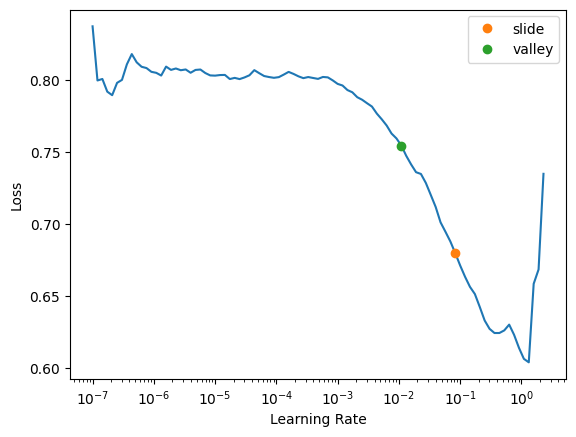

In [12]:
mensLearn.lr_find(suggest_funcs=(slide, valley))

SuggestedLRs(slide=0.0691830962896347, valley=0.009120108559727669)

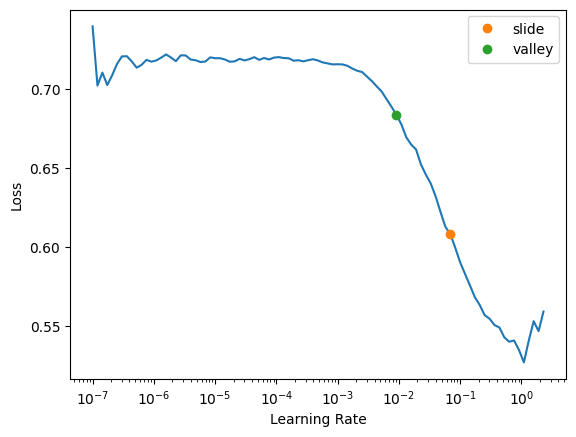

In [13]:
womensLearn.lr_find(suggest_funcs=(slide, valley))

Now lets fit our model for 10 epochs:  

In [14]:
mensLearn.fit(10, lr=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.351263,0.329803,0.847909,00:00
1,0.318636,0.331762,0.838403,00:00
2,0.299229,0.326740,0.855513,00:00
3,0.281280,0.332229,0.853612,00:00
4,0.266184,0.276185,0.895437,00:00
5,0.265729,0.283126,0.882129,00:00
6,0.266539,0.265857,0.891635,00:00
7,0.258779,0.262331,0.891635,00:00
8,0.244783,0.296985,0.874525,00:00
9,0.245560,0.264072,0.887833,00:00


In [15]:
womensLearn.fit(10, lr=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.321720,0.318183,0.863636,00:00
1,0.289997,0.301296,0.869697,00:00
2,0.264854,0.234336,0.912121,00:00
3,0.249802,0.199489,0.915152,00:00
4,0.234382,0.222487,0.900000,00:00
5,0.230994,0.197940,0.909091,00:00
6,0.225269,0.183127,0.921212,00:00
7,0.219524,0.193884,0.909091,00:00
8,0.212757,0.194927,0.915152,00:00
9,0.214206,0.231362,0.906061,00:00


90% accuracy is a good start! There are still many things that can and will be encorporated to improve this model such as ensembling, deriving feature importance, and experimenting with different data sets such as power rankings and regular season results. 

In [16]:
def feature_importance(learner, cat_names, cont_names): 
  # based on: https://medium.com/@mp.music93/neural-networks-feature-importance-with-fastai-5c393cf65815
    loss0=np.array([learner.loss_func(learner.pred_batch(batch=(x,y.to("cpu"))), y.to("cpu")) for x,y in iter(learner.dls)]).mean()
    fi=dict()
    types=[cat_names, cont_names]
    for j, t in enumerate(types):
      for i, c in enumerate(t):
        loss=[]
        for x,y in iter(learner.data.valid_dl):
          col=x[j][:,i]    #x[0] da hier cat-vars
          idx = torch.randperm(col.nelement())
          x[j][:,i] = col.view(-1)[idx].view(col.size())
          y=y.to('cpu')
          loss.append(learner.loss_func(learner.pred_batch(batch=(x,y)), y))
        fi[c]=np.array(loss).mean()-loss0
    d = sorted(fi.items(), key=lambda kv: kv[1], reverse=True)
    return pd.DataFrame({'cols': [l for l, v in d], 'imp': np.log1p([v for l, v in d])})

### Creating our input data:

Now we need to create inputs for our model to predict on. We will be using a kaggle data set that includes all of the 2024 NCAA Tournament seeds. For each team in the tournament we will create a row the teams season averages for the same stats we trained the model on.  

In [17]:
tourneySeeds= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/2024_tourney_seeds.csv')
seedsSeasonAvgs=pd.DataFrame()
mensRegularSeason= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MRegularSeasonDetailedResults.csv')
mensRegularSeason.set_index(['Season'],inplace=True)
mensCurrentSeason=mensRegularSeason.loc[2024]
womensRegularSeason= pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WRegularSeasonDetailedResults.csv')
womensRegularSeason.set_index(['Season'],inplace=True)
womensCurrentSeason=womensRegularSeason.loc[2024]
for i in range(len(tourneySeeds)):
    currentSeason=mensCurrentSeason
    currentTeamID= tourneySeeds.loc[i, 'TeamID']
    if currentTeamID>2000:
        currentSeason=womensCurrentSeason
    gamesWon=currentSeason.loc[currentSeason['WTeamID']==currentTeamID]
    gamesLost=currentSeason.loc[currentSeason['LTeamID']==currentTeamID]
    # # df.loc[df['column_name'] == some_value]
    wonAndLost= pd.concat([gamesWon, gamesLost])
    totalGames=wonAndLost.shape[0]
    seedsSeasonAvgs.loc[currentTeamID, 'Score']=(gamesWon['WScore'].sum()+gamesLost['LScore'].sum())/totalGames
    seedsSeasonAvgs.loc[currentTeamID, 'FG%']=(gamesWon['WFGM'].sum()+gamesLost['LFGM'].sum())/(gamesWon['WFGA'].sum()+gamesLost['LFGA'].sum())
    seedsSeasonAvgs.loc[currentTeamID, '3pt%']=(gamesWon['WFGM3'].sum()+gamesLost['LFGM3'].sum())/(gamesWon['WFGA3'].sum()+gamesLost['LFGA3'].sum())
    seedsSeasonAvgs.loc[currentTeamID, 'FT%']=(gamesWon['WFTM'].sum()+gamesLost['LFTM'].sum())/(gamesWon['WFTA'].sum()+gamesLost['LFTA'].sum())
    seedsSeasonAvgs.loc[currentTeamID, 'OffReb']=(gamesWon['WOR'].sum()+gamesLost['LOR'].sum())/totalGames
    seedsSeasonAvgs.loc[currentTeamID, 'DefReb']=(gamesWon['WDR'].sum()+gamesLost['LDR'].sum())/totalGames
    seedsSeasonAvgs.loc[currentTeamID, 'Ast']=(gamesWon['WAst'].sum()+gamesLost['LAst'].sum())/totalGames
    seedsSeasonAvgs.loc[currentTeamID, 'TO']=(gamesWon['WTO'].sum()+gamesLost['LTO'].sum())/totalGames
    seedsSeasonAvgs.loc[currentTeamID, 'Stl']=(gamesWon['WStl'].sum()+gamesLost['LStl'].sum())/totalGames
    seedsSeasonAvgs.loc[currentTeamID, 'Blk']=(gamesWon['WBlk'].sum()+gamesLost['LBlk'].sum())/totalGames
    seedsSeasonAvgs.loc[currentTeamID, 'PF']=(gamesWon['WPF'].sum()+gamesLost['LPF'].sum())/totalGames
seedsSeasonAvgs

,Score,FG%,3pt%,FT%,OffReb,DefReb,Ast,TO,Stl,Blk,PF
1163,81.470588,0.495988,0.366871,0.742470,10.088235,25.176471,18.529412,9.117647,6.235294,5.382353,16.235294
1235,75.558824,0.463353,0.348509,0.696801,9.235294,21.764706,15.735294,10.205882,10.441176,3.058824,16.470588
1228,84.411765,0.471145,0.349383,0.744681,11.382353,26.676471,13.000000,10.294118,4.235294,3.794118,15.352941
1120,83.323529,0.475338,0.352258,0.751899,9.794118,24.676471,17.911765,10.147059,7.411765,6.205882,19.205882
1361,74.187500,0.439037,0.312588,0.728959,9.750000,24.125000,13.031250,10.281250,7.250000,4.062500,17.718750
...,...,...,...,...,...,...,...,...,...,...,...
3162,76.000000,0.453534,0.328169,0.711900,12.689655,23.689655,16.793103,14.448276,7.413793,2.310345,17.241379
3267,84.300000,0.424011,0.340426,0.665116,13.433333,20.666667,15.800000,16.300000,12.566667,2.566667,21.633333
3238,68.758621,0.389663,0.284351,0.713475,13.103448,24.413793,11.586207,14.517241,7.000000,5.172414,17.758621
3263,64.272727,0.401936,0.301627,0.747525,10.151515,22.545455,14.575758,11.484848,7.242424,2.151515,14.363636


### Simulating the tournament:

The following cell is used to simulate the mens and womens tournaments respectivly. In order to achieve this we will store the teams for each region in an array. The runTournament function simulates an entire tournament and stores the results of games in a data frame which can be converted into a csv. Each iteration simulates a given game by selecting the team with a higher prediction score from our model. The seeding of the respective region arrays are updated and the process is repeated for each round.

In [18]:
#Preparing mens seeding into their respective region arrays
W=[]
X=[]
Y=[]
Z=[]
mensRounds=[W,X,Y,Z]
for i in range(64):
    if i<16:
        if i<9:
            mensRounds[0].append(('W0'+str(i+1), tourneySeeds.loc[i, 'TeamID']))
        else:
            mensRounds[0].append(('W'+str(i+1), tourneySeeds.loc[i, 'TeamID']))
    if i<32 and i>15:
        if (i%16)<9:
            mensRounds[1].append(('X0'+str((i%16)+1), tourneySeeds.loc[i, 'TeamID']))
        else:
            mensRounds[1].append(('X'+str((i%16)+1), tourneySeeds.loc[i, 'TeamID']))
    if i<48 and i>31:
        if (i%16)<9:
            mensRounds[2].append(('Y0'+str((i%16)+1), tourneySeeds.loc[i, 'TeamID']))
        else:
            mensRounds[2].append(('Y'+str((i%16)+1), tourneySeeds.loc[i, 'TeamID']))
    if i<64 and i>47:
        if (i%16)<9:
            mensRounds[3].append(('Z0'+str((i%16)+1), tourneySeeds.loc[i, 'TeamID']))
        else:
            mensRounds[3].append(('Z'+str((i%16)+1), tourneySeeds.loc[i, 'TeamID']))
#Preparing womens seeding into their respective region arrays
wW=[]
wX=[]
wY=[]
wZ=[]
womensRounds=[wW,wX,wY,wZ]
for i in range(64,128,1):
    if i<80 and i>63:
        if (i%16)<9:
            womensRounds[0].append(('W0'+str((i%16)+1), tourneySeeds.loc[i, 'TeamID']))
        else:
            womensRounds[0].append(('W'+str((i%16)+1), tourneySeeds.loc[i, 'TeamID']))
    if i<96 and i>79:
        if (i%16)<9:
            womensRounds[1].append(('X0'+str((i%16)+1), tourneySeeds.loc[i, 'TeamID']))
        else:
            womensRounds[1].append(('X'+str((i%16)+1), tourneySeeds.loc[i, 'TeamID']))
    if i<112 and i>95:
        if (i%16)<9:
            womensRounds[2].append(('Y0'+str((i%16)+1), tourneySeeds.loc[i, 'TeamID']))
        else:
            womensRounds[2].append(('Y'+str((i%16)+1), tourneySeeds.loc[i, 'TeamID']))
    if i<128 and i>111:
        if (i%16)<9:
            womensRounds[3].append(('Z0'+str((i%16)+1), tourneySeeds.loc[i, 'TeamID']))
        else:
            womensRounds[3].append(('Z'+str((i%16)+1), tourneySeeds.loc[i, 'TeamID']))
submission= pd.DataFrame()
def mapRoundsHelper(i,k):
    if i==1:# if round 1 map to 1,8,5,4,6,3,7,2 game order format, k is 0 based
        if k==1: return 7
        if k==2: return 4
        if k==4: return 5
        if k==5: return 2
        if k==7: return 1
    if i==2: # if round 2 map to 1,4,3,2 game order format
        if k==1: return 3
        if k==3: return 1
    return k
#predictChampionshipGames is used to predict the final four and championship games
#which involve teams from different regions.
def predictChampionshipGames(i,j,k,l,mensOrNot,rowIndex, numGames, learner, slot, bracket, Rounds):
    submission.loc[rowIndex, 'RowId']=rowIndex
    if(mensOrNot==1):
        submission.loc[rowIndex, 'Tournament']='M'
    else:
        submission.loc[rowIndex, 'Tournament']='W'
    submission.loc[rowIndex, 'Bracket']=bracket
    team1Seed, team1ID= Rounds[j][k]
    team2Seed, team2ID= Rounds[l][k]
    row, clas, team1Prediction = learner.predict(seedsSeasonAvgs.loc[team1ID])
    row, clas, team2Prediction = learner.predict(seedsSeasonAvgs.loc[team2ID])
    team1SeedNum=int(team1Seed[1:2])
    team2SeedNum=int(team2Seed[1:2])
    if team1SeedNum > team2SeedNum :
        submission.loc[rowIndex, 'Slot']=slot
    else:
        submission.loc[rowIndex, 'Slot']=slot
    if team1Prediction[1] > team2Prediction[1]:
        submission.loc[rowIndex, 'Team']=team1Seed
    else:
        submission.loc[rowIndex, 'Team']=team2Seed
        Rounds[j][k]=Rounds[l][k]

rowIndex=0   
#runTournament simulates and an entire tournament and then stores the result 
#of each game in a data frame which can be converted to a csv. 
def runTournament(learner, mensOrNot, Rounds, bracket,rowIndex):
    numGames=8
    for i in range(1,5,1):#i is the current Round
        for j in range(4):#j is the current region
            for k in range(numGames):#k is the current game
                mapK=mapRoundsHelper(i,k)
                submission.loc[rowIndex, 'RowId']=rowIndex
                if(mensOrNot==1):
                    submission.loc[rowIndex, 'Tournament']='M'
                else:
                    submission.loc[rowIndex, 'Tournament']='W'
                submission.loc[rowIndex, 'Bracket']=bracket
                team1Seed, team1ID= Rounds[j][mapK]
                team2Seed, team2ID= Rounds[j][numGames*2-mapK-1]
                row, clas, team1Prediction = learner.predict(seedsSeasonAvgs.loc[team1ID])
                row, clas, team2Prediction = learner.predict(seedsSeasonAvgs.loc[team2ID])
                submission.loc[rowIndex, 'Slot']='R'+str(i)+str(team1Seed[0])+str(mapK+1)
                if team1Prediction[1] > team2Prediction[1]:
                    submission.loc[rowIndex, 'Team']=team1Seed
                else:
                    submission.loc[rowIndex, 'Team']=team2Seed
                    Rounds[j][mapK]=Rounds[j][numGames*2-mapK-1]
                rowIndex=rowIndex+1
        numGames=numGames//2
    #Final Four Games
    predictChampionshipGames(5,0,0,1,mensOrNot,rowIndex, numGames, learner, 'R5WX',bracket,Rounds)
    rowIndex=rowIndex+1
    predictChampionshipGames(5,2,0,3,mensOrNot,rowIndex, numGames, learner, 'R5YZ',bracket,Rounds)
    rowIndex=rowIndex+1
    #Championship Game
    predictChampionshipGames(5,0,0,2,mensOrNot,rowIndex, numGames, learner, 'R6CH',bracket,Rounds)
runTournament(mensLearn, 1, mensRounds,1,rowIndex)
rowIndex=63
runTournament(womensLearn, 0, womensRounds,1,rowIndex)
submission

,RowId,Tournament,Bracket,Slot,Team
0,0.0,M,1.0,R1W1,W01
1,1.0,M,1.0,R1W8,W08
2,2.0,M,1.0,R1W5,W12
3,3.0,M,1.0,R1W4,W04
4,4.0,M,1.0,R1W6,W06
...,...,...,...,...,...
121,121.0,W,1.0,R4Y1,Y10
122,122.0,W,1.0,R4Z1,Z10
123,123.0,W,1.0,R5WX,W01
124,124.0,W,1.0,R5YZ,Y10


Now that we have our submission dataframe we can convert this to a csv and print our results.

In [19]:
submission['RowId']=submission['RowId'].astype(int)
submission['Bracket']=submission['Bracket'].astype(int)
submission.to_csv('submission.csv', index=False)
!head submission.csv

RowId,Tournament,Bracket,Slot,Team
0,M,1,R1W1,W01
1,M,1,R1W8,W08
2,M,1,R1W5,W12
3,M,1,R1W4,W04
4,M,1,R1W6,W06
5,M,1,R1W3,W03
6,M,1,R1W7,W10
7,M,1,R1W2,W15
8,M,1,R1X1,X01
